<center><u><b>FINAL EXAM<b></u>
<center>Phys520 — 2019
<center>Julia Lascar

### Question 1

In this problem, we will work out when it is faster to use Fourier-based techniques in n−body simulations instead of directly summing forces be- tween each pair of particles.
- - -
<b>A)</b> First, we will work out how long it will take to calculate gravity by Fourier transforming a grid. If we have a 3-dimensional grid with m cells along each side, how many total cells do we have?
- - -

We have a total cell count of $M=m \times m \times m = m^3$

- - -
<b>B)</b> Roughly how many operations will we need to carry out to do the Fourier transform? I don’t care about the coefficient, but I do care about the scaling with m. We will assume (usually justifiably so) that the work for the mesh is dominated by the FFTs. Let the run time equal a times this operation count.
- - -

When doing a fast fourier transform, we get a runtime of O(xlogx), and in this case we are transforming the density $\rho = \frac{N}{M}=\frac{N}{m^3}$, (where N is the number of particles) so the runtime R becomes:

$R \approx a \frac{N}{m^3} log(\frac{N}{m^3})$

- - -
<b>C)</b> If we instead calculate the forces between every pair of particles, how many operations do we need to do for n particles? Again, the scaling with n needs to be correct but don’t sweat the coefficient. Let the run time equal b times the operation count (so, if the operation count scaled like n to the first power, our run time would be bn.)
- - -

The number of unique pairs in a commutative set is $\frac{N(N-1)}{2}$. This can be proven by considering that a particle $n_0$ can form $(N-1)$ pairs, then $n_1$ can form $(N-2)$ pairs (not repeating the pair with $n_1$), and so on such that we have:

$N_{pairs}=(N-1)+(N-2)+ ... +(N-(N-1)=1+2+...+(N-2)+(N-1)$

$2N_{pairs}=(N-1)+(N-2+1)+(N-3+2)+...+(1+N-2)+(N-1)=N(N-1)$

$N_{pairs}=\frac{N(N-1)}{2}$

So, our operation count will be:

$R \approx b\frac{N(N-1)}{2}$

- - -
<b>D)</b> Given the scalings from the previous questions, what is the critical value for m at which the grid-based and brute-force techniques take the same run time? In practice, though hard to predict, the coefficients a and b will be of similar magnitude, and easy to measure with quick timing runs. Note - if you get a transcendental equation, feel free to treat the logarithm of m as a constant. In practice, you can pick a starting value for the log, solve for m keeping that fixed, then repeat using your updated values of m in the log. This converges extremely quickly.
- - -

The critical value is reached when: 

$R_{grid}=R_{brute}$

$a \frac{N}{m^3} log(\frac{N}{m^3}) =b\frac{N(N-1)}{2}$

Since we view a and b to be of similar magnitude, they cancel each other out (b/a=1). Then:

$\frac{N}{m^3} \big(log(N)-log(m^3)\big) =\frac{N(N-1)}{2}$

$log(N)-3log(m) =\frac{m^3(N-1)}{2}$

We want to isolate m, but we remember that we treat log(m) as a constant, so:

$m^3=\frac{2(log(N)-3log(m))}{(N-1)}$

$m=\Big(\frac{2log(N/m^3)}{(N-1)}\Big)^{1/3}$

- - -
<b>E)</b> Interpret your answer to part D) and write down a rule of thumb for when a grid will be faster than brute-force in three dimensions. For instance, one possible answer would be “a grid will be faster when there are many particles in each 3-dimensional grid cell, and slower when the average number of particles per cell is much less than one.” This may or may not be correct, but your answer should look something like that. There are many possible answers, but one useful one is to express the average number of particles per cell in terms of the total number of particles plus numerical constants.
- - -

A grid will be faster than brute force when: 

$R_{grid} < R_{brute}$

$\frac{N}{m^3} log(\frac{N}{m^3}) < \frac{N(N-1)}{2}$

$log(\frac{N}{m^3}) < \frac{m^3(N-1)}{2}$

$log(\frac{N}{m^3})\frac{2}{(N-1)} < m^3$

$(N-1)\big(2log(\frac{N}{m^3})\big)^{-1} > 1/m^3$

$N(N-1)\big(2log(\frac{N}{m^3})\big)^{-1} > N/m^3$

$N(N-1)log(\rho) > \rho$

When the average number of particles per cell is much lower than one, $log(\rho)$ will be negative and so this will necessarily be false since $\rho$ and N(N-1) are positive. Thus, our rule of thumb can be: "A grid will be faster when the density of particles is high." 

### Question 2

We saw in class that the incompressible advection equation 


<center>$∂ρ/∂t + u · ∇ρ = 0$

became unconditionally unstable when we used a first-order derivative for t and a second-order derivative for ρ.
- - -
<b>A)</b> This scheme, the so-called forward time, centered space or FTCS, has


<center>$ρ(t + δt, x) = ρ(t, x) − uδt (ρ(t, x + δx) − ρ(t, x − δx))/2δx$

By plugging in complex exponentials, show that this scheme is indeed numerically unstable.
- - -

We plug in complex exponentials: $\rho(x,t)=A(t)e^{ikx}$

$A(t+\delta t)e^{ikx}=A(t)e^{ikx}-u\frac{\delta t}{\delta x}A(t)(e^{ik(x+\delta x)}-e^{ik(x-\delta x)})/2$

$\frac{A(t+\delta t)}{A(t)}e^{ikx}=e^{ikx}-u\frac{\delta t}{\delta x}\big(e^{ikx}(e^{ik\delta x)}-e^{-ik\delta x)})\big)/2$

$\frac{A(t+\delta t)}{A(t)}=1-u\frac{\delta t}{\delta x}(e^{ik\delta x)}-e^{-ik\delta x)})/2$

We remember that from Euler's formula: 
$e^{ix}=cos(x)+isin(x)$

$isin(x)=(e^{ix)-e^{-ix})/2$

So: 

$\frac{A(t+\delta t)}{A(t)}=1-u\frac{\delta t}{\delta x}isin(k\delta x)$

$|\frac{A(t+\delta t)}{A(t)}|= \sqrt{1 + \big(u\frac{\delta t}{\delta x}sin(k\delta x)\big)^2}$

So $|\frac{A(t+\delta t)}{A(t)}| \geq 1$, meaning that the solution will never converge — i.e. it is unstable.

- - -
<b>B)</b> We also claimed (and saw in practice) that the Lax version of this was stable. The Lax solution uses $ρ(t,x+δx)+ρ(t,x−δx)/2$ in place of ρ(t, x) in the right-hand side. Derive the stability constraint for this Lax solution.
- - -

Our equation becomes:

$ρ(t + δt, x) = ρ(t,x+δx)+ρ(t,x−δx)/2 − uδt (ρ(t, x + δx) − ρ(t, x − δx))/2δx$

Replacing with complex exponentials in the same fashion as in A) and remembering that cos(x)=(e^{ix)+e^{-ix})/2: 

$\frac{A(t+\delta t)}{A(t)}=cos(k\delta x)-iu\frac{\delta t}{\delta x}sin(k\delta x)$

So $|\frac{A(t+\delta t)}{A(t)}|=\sqrt{cos^2(k\delta x) + \big(u\frac{\delta t}{\delta x}sin(k\delta x)\big)^2}$

Since $cos^2(k\delta x) \leq 1$ and $sin^2(k\delta x) \leq 1$, 

$|\frac{A(t+\delta t)}{A(t)}|\leq 1$ if $(u\frac{\delta t}{\delta x})^2\leq 1$

So the stability constraint of the Lax solution is: 

$\delta t \leq \frac{\delta x}{u}$


### Question 3

One way we saw in class to generate weights for arbitrary order numerical integration was to use Legendre polynomials and, after inverting a matrix, take the coefficients that go into the P0 term. Another way is to fit a normal $x, x^2, x^3$...) polynomial to data points, then integrate to get the area under each term in the polynomial, and add together to get the integration weights. We will do this by working out the area under a polynomial defined by n points evenly spaced from -1 to 1. In this problem, we will derive the integration weights for arbitrary order using standard polynomial fits.
- - -
<b>A)</b> What is the integral of $x^k$ from x= −1 to 1 as a function of k? We will refer to this area as $a_k$. If we have n points, k will go from zero to n−1. Explain why we will in general select n to be odd?
- - -

$\int_{-1}^1 x^k = \Big[\frac{1}{k+1}x^{k+1}\Big]^1_{-1}=\big(\frac{1}{k+1}\big)-\big(\frac{(-1)^{k+1}}{k+1}\big)$

$\int_{-1}^1 x^k = 0$ if k is odd, 
$\frac{2}{(k+1)}$ if k is even. 

Selecting n to be odd means that n-1 will be even, and thus we'll have a non-zero solution. 

- - -
<b>B)</b> Show that the least-squares equations reduce to $m = A^{−1}d$ for the special case that A is square and invertible.
- - -

We know that $\chi^2 = \frac{\sum (x_i - \mu_i)^2}{\sigma_i^2}$

Then $\chi^2 = (d-\mu)^T N^{-1}(d-\mu)$ where d is our data and $\mu$ is our model.

$\mu_i=\sum_j A_{ij}m_j$ or $\mu=Am$ where A is a matrix of polynomials evaluated at x while m is the vector with coefficients. 

$\chi^2 =(d-Am)^TN^{-1}(d-Am)$

$\frac{d\chi^2}{dm}=0$ to minimize $\chi^2$

$\frac{d\chi^2}{dm}=-A^TN^{-1}(d-Am)-(d-Am)^TN^{1}A=-2A^TN^{-1}(d-Am)=0$

$A^TN^{-1}(d-Am)=0$

$A^TN^{-1}d-A^TN^{-1}Am=0$

$A^TN^{-1}d=A^TN^{-1}Am$

Since A is inversible: $A^{-1}A^TN^{-1}d=A^{-1}A^TN^{-1}Am$ 

$(AA^{-1})^TN^{-1}d=(AA^{-1})^TN^{-1}Am$ 

$N^{-1}d=N^{-1}Am$ 

$NN^{-1}d=NN^{-1}Am$ 

$d=Am$, or $m=A^{-1}m$ 

- - -
<b>C)</b> The area under the curve defined by n points can now be expressed as the sum over the m polynomial coefficients times the area under the kth polynomial, i.e.
$area = \sum{􏰇􏰇a_km_k} = a^Tm = a^T 􏰀A^{−1}d􏰉$. 

This is not a convenient way of expressing the area, however. Instead, we can regroup the multiplication and do the $A^{−1}$ and $a_k$ multiplication first. This will give us a set of weights that will then be applied to the data, so our estimate of the area will be 􏲐$\sum w_id_i$ with i ranging from 0 to n − 1. Write code that does this, and prints out the weights as a function of n. Since we are integrating from -1 to 1, if the data are all equal to 1, the area should be 2, and hence the sum of the weights as we have defined them so far should be 2. You can use this fact to debug your code (in case, say, you got a transpose wrong).
- - -

In [221]:
import numpy as np

npoly=3

def poly_mat(npt,npoly):
    mat=np.zeros([npt,npoly])
    mat[:,0]=1
    x=np.linspace(-1,1,npt)
    for i in range(0,npt):
            for j in range(0,npoly):
                mat[i,j]=x[i]**j
    return mat

                
def weights(npt,npoly):
    x=np.linspace(-1,1,npt)
    A=poly_mat(npt,npoly)
    Ai=np.linalg.pinv(A)
    ak=[]
    for k in range(npoly):
        if (k % 2) == 0:
            ak.append(2/(k+1))
        else:
            ak.append(0)
    ak=np.matrix(ak)
    w=np.dot(ak,Ai)
    return w



print("As expected we find that the sum of weights is", np.sum(weights(5,5)))
print("For 3 points at 3rd order, we find",weights(3,3),".")
print("for 5 points at 5th order we find",weights(5,5),", etc." )


As expected we find that the area is 2.0
For 3 points at 3rd order, we find [[0.33333333 1.33333333 0.33333333]] .
for 5 points at 5th order we find [[0.15555556 0.71111111 0.26666667 0.71111111 0.15555556]] , etc.


- - -
<b>D)</b> Normally, we define dx to be the spacing between points. In this
case, the area under a flat segment of data should be (n−1)dx. Adjust (and
reprint) your weights so that they are normalized as per usual. If all has
gone well, you should get the usual Simpson’s method weights (with the dx
factored out) of 1/3 [1 4 1], and the 5th order weights are 1/45 [14 64 24 64 14].
- - -

In [222]:
def weightsnorm(weights,n):
    wn=weights/(2/(n-1))
    return wn
w3=weights(3,3)
w5=weights(5,5)
w3n=weightsnorm(w3,3)*3
w5n=weightsnorm(w5,5)*45
print("After normalizing, for 3 points at 3rd order, we find",w3n,".")
print("for 5 points at 5th order we find",w5n,", etc." )

After normalizing, for 3 points at 3rd order, we find [[1. 4. 1.]] .
for 5 points at 5th order we find [[14. 64. 24. 64. 14.]] , etc.


- - -
<b>E)</b> Use these weights to integrate $e^x$ from -1 to 1. Use roughly 30 points for n = 3, 5, 7, 9 and print out your error vs. the analytic expectation. Be careful to make sure the actual number of points you use is consistent with the integration order you have chosen (e.g. for n = 5, you are allowed to use 5,9,14,19... points).
- - -

In [234]:
npt=30
def integrate(n,ord):
    x=np.linspace(-1,1,n)
    y=np.exp(x)
    y=np.matrix(y)
    I=weights(n,ord)*np.transpose(y)
    return I

analytic=np.exp(1)-np.exp(-1) #expected analytic answer
print(analytic)

for n in (3,5,7,9):
    print("At",n,"order, we find I=",integrate(npt,n)," giving us an error of:",(np.abs(analytic-integrate(npt,n)))/analytic)
print(integrate(npt,n))



2.3504023872876028
At 3 order, we find I= [[2.35103837]]  giving us an error of: [[0.00027059]]
At 5 order, we find I= [[2.35040777]]  giving us an error of: [[2.29114134e-06]]
At 7 order, we find I= [[2.35040241]]  giving us an error of: [[9.71397623e-09]]
At 9 order, we find I= [[2.35040239]]  giving us an error of: [[2.67188239e-11]]
[[2.35040239]]


### Question 4

I have hidden an unknown Lorentzian in the file “lorentz data.txt”. Your job is to find it. The standard parameterization is
$L=a/(1 + 􏱟 ( \frac{x−x0}{w})^2)$
where a is the amplitude, x0 is the center, and w is the width. I will tell you the noise is white (Gaussian, with uniform amplitude, uncorrelated from sample to sample) and that the width is at least 10 samples and at most 2000. You can load the data with “y=np.loadtxt(’lorentz data.txt’)”.

- - -
<b>A)</b> Select a range of possible widths that cover the width range in ques- tion, and carry out matched filters for each of your widths. For each width, report the maximum amplitude and corresponding x0.
- - -

In [4]:
import numpy as np
from matplotlib import pyplot as plt
y=np.loadtxt("/Users/jmlascar/phys512/exams/lorentz_data.txt")
x=np.linspace(0,len(y),len(y))
w=np.linspace(10,2000,10)
a=np.linspace(-1.5,1.5,10)
x0=np.linspace(0,len(y),10)

def model(w,x,a=1,x0=len(y)/2):
    M=a/(1+(((x-x0)/w))**2)
    return M
    


def template(y,model):
    N=np.random.normal(np.mean(y),np.std(y),len(y))
    t=model+N
    return t

plt.show()
plt.plot(x,y)
plt.plot(model(100,x))
plt.plot(template(y,model(100,x)))


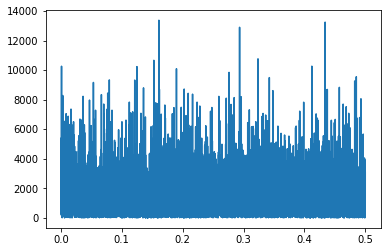

In [5]:
YFT = np.fft.rfft(y)
PS = np.abs(YFT**2)
plt.figure()
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,PS)


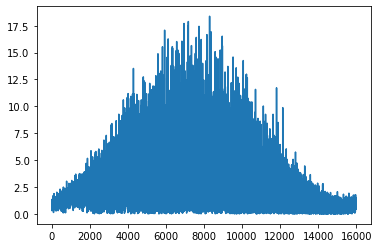

In [9]:
template_ft_w = np.fft.rfft(window*T)
mf_ft = y_ft_w * np.conj(template_ft_w )
mf = np.fft.irfft(mf_ft, len(y))
mf = np.fft.fftshift(mf)
mf= np.abs(mf)
plt.plot(mf)

In [121]:
import scipy.signal.windows as wind
from scipy.ndimage import gaussian_filter
window = wind.nuttall(len(y))
y_ft_w = np.fft.rfft(window*y)

#to get the following limits, I ran my code multiple times and refined them
w=np.linspace(100,500,100) 
a=np.linspace(0.1,0.3,100)
x0=np.linspace(4500,5000,100)

TemplateFTW=[]
MF=[]
plt.show()
Spike=[]
Loop=[]

#we slide our match filter accross ranges of parameters and see which is the best guess
for i in range(40):
    for j in range(10):
        for k in range(40):
            T=template(y,model(w[i],x,a=a[j],x0=x0[k]))
            tw=np.fft.rfft(window*T)
            TemplateFTW.append(tw)
            mf_ft = y_ft_w * np.conj(tw)
            mf = np.fft.irfft(mf_ft, len(y))
            mf = np.fft.fftshift(mf)
            mf= np.abs(mf)
            Spike.append(np.max(mf)/np.mean(mf))
            Loop.append(["i j k",i,j,k])
            MF.append(mf)
            
#print(MFFT)


(16000,)
['i j k', 18, 3, 23]


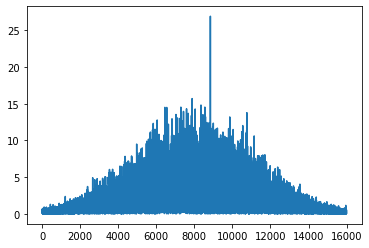

In [122]:
print(np.shape(Spike))
i = np.argmax(Spike)
print(Loop[i])
plt.plot(MF[i]) #Our filter with the best spike

In [123]:
print("w",w[18],"a",a[9],"x0",x0[15])
print(np.max(MF[i])/np.mean(MF[i])) #Our best parameter

w 172.72727272727275 a 0.1181818181818182 x0 4575.757575757576
13.451735709371134


- - -
<b>B)</b> Using your starting guess from part A), write either a Newton’s method (or Levenberg-Marquardt if you have trouble converging, but you shouldn’t need to for a suitably sensible starting guess) or MCMC. Your script should report the best fit parameters and estimates of their errors.
- - -

In [56]:
def newton_minimizer(x, y, y_model, p):
    w=p[0]
    a=p[1]
    x0=p[2]
    derivs = np.zeros((len(y), len(p)))
    xx = x - x0
    xw = 1 + (xx/w)**2
    lorentz=a/xw
    # Derivative with respect to w
    x2w3=xx**2/(w**3)
    derivs[:,0] = 2*a*x2w3/(xw**2)
    # Derivative with respect to a
    derivs[:,1] = 1/xw
    # Derivative with respect to x0
    xw2=xx/(w**2)
    derivs[:,2] = 2*a*xw2/(xw**2)
    
    r = y - y_model #residual array 
    
    delta_p = np.linalg.inv(derivs.T@derivs)@derivs.T@r
    p_new = p + delta_p
    return p_new, delta_p

In [129]:
def calc_chisq(data, model):
    return np.sum((data - model)**2)

def newton_iterate(x, y, p):
    w = p[0]
    a = p[1]
    x0 = p[2]
    N=np.random.normal(np.mean(y),np.std(y),len(y))
    y_model = model(w,x,a,x0)+N
    p = np.array([w,a,x0])
    old_chisq = calc_chisq(y, y_model)
    delta_chisq = 1000
    i = 1
    # Iterate on Newton's method
    while True:
        print("parameters",p)
        p, delta_p = newton_minimizer(x, y, y_model, p)
        y_model = model(p[0],x,p[1],p[2])+N
        new_chisq = calc_chisq(y, y_model)
        delta_chisq = new_chisq - old_chisq
        print("chi=",new_chisq)
        print("delta chi=",delta_chisq)
        # If deltachisq << 1, break out of loop
        if abs(delta_chisq) < 1e-5:
            break
        # Else keep iterating
        else:
            i += 1
            old_chisq = new_chisq
    return p

p2=[172,0.118,4575]
p=newton_iterate(x, y, p2)

parameters [1.720e+02 1.180e-01 4.575e+03]
chi= 2945.003088093341
delta chi= -0.8234932035306883
parameters [2.40176888e+02 5.15691572e-02 4.64806108e+03]
chi= 2944.6945754503836
delta chi= -0.30851264295733927
parameters [1.85744086e+02 7.89379097e-02 4.85168061e+03]
chi= 2944.4435127166803
delta chi= -0.2510627337032929
parameters [1.95442648e+02 8.40702694e-02 4.73846622e+03]
chi= 2944.3753674609056
delta chi= -0.06814525577465247
parameters [1.58947369e+02 9.63875154e-02 4.77364419e+03]
chi= 2944.372545140034
delta chi= -0.0028223208714734938
parameters [1.54336942e+02 1.00881071e-01 4.77234598e+03]
chi= 2944.3725003009863
delta chi= -4.483904785956838e-05
parameters [1.55249804e+02 1.00668615e-01 4.77317313e+03]
chi= 2944.372497250305
delta chi= -3.0506812436215114e-06


In [130]:
print(p)

[1.54898691e+02 1.00784389e-01 4.77304138e+03]


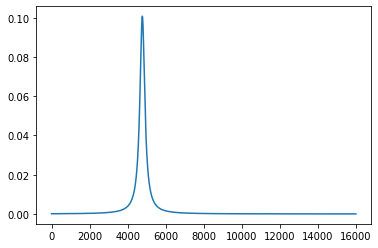

In [131]:
plt.plot(model(p[0],x,p[1],p[2]))